In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

In [2]:
ANSWER_PATH = 'answers'

In [3]:
def write_single_answer(answer, task_number):
    answer_path = os.path.join(
        ANSWER_PATH,
        f"answer{task_number}.txt"
    )
    with open(answer_path, "w") as fout:
        fout.write(str(answer))

In [4]:
TEST_SIZE = 0.25
TREE_AMOUNT = 50
boston = datasets.load_boston()

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
X = boston['data']
y = boston['target']

X_size = X.shape[0]
X_train_size = int(X_size*(1-TEST_SIZE))+1

X_train, X_test, y_train, y_test = (
    X[:X_train_size], X[X_train_size:], y[:X_train_size], y[X_train_size:]
)

In [7]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

# 2

In [8]:
base_algorithms_list=[]
coefficients_list=[]
s = y_train
for i in range(TREE_AMOUNT):
    tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_regressor.fit(X=X_train, y=s)
    base_algorithms_list.append(tree_regressor)
    coefficients_list.append(0.9)
    s = y_train - gbm_predict(X_train)
    
    
error = mean_squared_error(y_test, gbm_predict(X_test))
rmse = error**0.5
write_single_answer(rmse, 2)
print(rmse)

5.455472074527531


# 3

In [9]:
base_algorithms_list=[]
coefficients_list=[]
s = y_train
for i in range(TREE_AMOUNT):
    tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_regressor.fit(X=X_train, y=s)
    base_algorithms_list.append(tree_regressor)
    coefficients_list.append(0.9/(1 + i))
    s = y_train - gbm_predict(X_train)
    
error = mean_squared_error(y_test, gbm_predict(X_test))
rmse = error**0.5
write_single_answer(rmse, 3)

# XGB library (test for N_ESTIMATORS)

In [10]:
N_ESTIMATORS = np.arange(10, 200, 10)
train_error = list()
test_error = list()

for n_estimator in N_ESTIMATORS:
    gbm = xgb.XGBClassifier(
    max_depth=5,
    random_state=42,
    n_estimators=n_estimator
    )
    gbm.fit(X_train, y_train)
    train_predictions = gbm.predict(X_train)
    test_predictions = gbm.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    train_error.append(
        train_mse**0.5
    )
    test_error.append(
        test_mse**0.5
    )

C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocess

C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocess

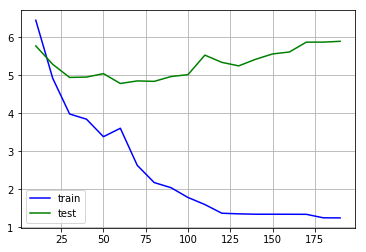

In [11]:
plt.figure()
plt.grid(True)
plt.plot(
    N_ESTIMATORS,
    train_error,
    color='blue',
    label='train'
)
plt.plot(
    N_ESTIMATORS,
    test_error,
    color='green',
    label='test'
)
plt.legend(loc = 'best')
plt.show()

# XGB library (test for MAX_DEPTH)

In [12]:
MAX_DEPTH = np.arange(10, 200, 10)
train_error = list()
test_error = list()

for depth in MAX_DEPTH:
    gbm = xgb.XGBClassifier(
    max_depth=depth,
    random_state=42,
    n_estimators=50
    )
    gbm.fit(X_train, y_train)
    train_predictions = gbm.predict(X_train)
    test_predictions = gbm.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    train_error.append(
        train_mse**0.5
    )
    test_error.append(
        test_mse**0.5
    )

C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocess

C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\preprocess

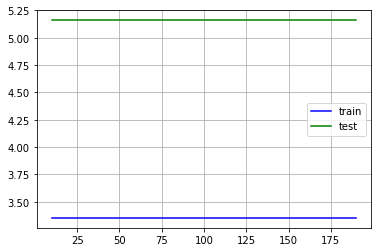

In [13]:
plt.figure()
plt.grid(True)
plt.plot(
    MAX_DEPTH,
    train_error,
    color='blue',
    label='train'
)
plt.plot(
    MAX_DEPTH,
    test_error,
    color='green',
    label='test'
)
plt.legend(loc = 'best')
plt.show()

# Linear Regression Comparison

In [14]:
from sklearn.linear_model import LinearRegressionarRegressionarRegression

In [15]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

error = mean_squared_error(y_test, linear_regression.predict(X_test))
rmse = error**0.5
write_single_answer(rmse, 5)